# Group Assignment #3: A Clean Notebook

## Compilation of Work

We decide to shift to block group data for further analysis as it will help us perform better autocorrelations studies. For this purpose, we downloaded data for two years, 2019 and 2013. There is no 2013 block group level data avaliable for our variables,  hence we shift to 2013, which is still before the projects were competed and hence within the time frame.  
In this note book we will
1. Import 2019 data and narrow it down to relevant variables.
2. Import 2013 data and do a spatial join to obtain geodataframe, and also narrow it down to relevant variables
3. Create percentage for different ethnicity groups for each year.
4. Create a percentage change for various ethnicity groups from 2013 to 2019. 

We only need the pandas and geopandas library for all these tasks. 

In [152]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

import matplotlib.pyplot as plt

import contextily as ctx

In [44]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

## Import 2019 data and narrow it down to relevant variables.

The data is available at census explorer as a geoJSON format, hence saving considerable time. First to check our data.

In [45]:
b2019 = gpd.read_file("acs2019_5yr_B03002_15000US060014094001.geojson")
b2019.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,05000US06001,"Alameda County, CA",1656754.0,0.0,1285735.0,0.0,520447.0,487.0,171168.0,1541.0,...,181.0,173837.0,4242.0,32773.0,1822.0,16655.0,1275.0,16118.0,1291.0,"MULTIPOLYGON (((-122.28088 37.70723, -122.2817..."
1,15000US060014001001,"Block Group 1, Alameda, CA",3120.0,208.0,3002.0,191.0,2317.0,235.0,107.0,68.0,...,12.0,34.0,33.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466..."
2,15000US060014002001,"Block Group 1, Alameda, CA",990.0,138.0,894.0,129.0,761.0,129.0,13.0,13.0,...,12.0,5.0,7.0,23.0,25.0,0.0,12.0,23.0,25.0,"MULTIPOLYGON (((-122.25508 37.84607, -122.2542..."
3,15000US060014002002,"Block Group 2, Alameda, CA",1017.0,123.0,939.0,129.0,714.0,116.0,39.0,46.0,...,12.0,12.0,14.0,32.0,34.0,14.0,25.0,18.0,25.0,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577..."
4,15000US060014003001,"Block Group 1, Alameda, CA",1134.0,238.0,1059.0,241.0,735.0,215.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-122.25186 37.84475, -122.2517..."


The Row 1 is total of rows which we need to remove. Let us drop this row.

In [46]:
b2019=b2019.drop([0])
b2019.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
1,15000US060014001001,"Block Group 1, Alameda, CA",3120.0,208.0,3002.0,191.0,2317.0,235.0,107.0,68.0,...,12.0,34.0,33.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466..."
2,15000US060014002001,"Block Group 1, Alameda, CA",990.0,138.0,894.0,129.0,761.0,129.0,13.0,13.0,...,12.0,5.0,7.0,23.0,25.0,0.0,12.0,23.0,25.0,"MULTIPOLYGON (((-122.25508 37.84607, -122.2542..."
3,15000US060014002002,"Block Group 2, Alameda, CA",1017.0,123.0,939.0,129.0,714.0,116.0,39.0,46.0,...,12.0,12.0,14.0,32.0,34.0,14.0,25.0,18.0,25.0,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577..."
4,15000US060014003001,"Block Group 1, Alameda, CA",1134.0,238.0,1059.0,241.0,735.0,215.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-122.25186 37.84475, -122.2517..."
5,15000US060014003002,"Block Group 2, Alameda, CA",1237.0,263.0,1139.0,255.0,1008.0,248.0,18.0,27.0,...,12.0,37.0,60.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-122.26230 37.83786, -122.2622..."


Now to retain only columns we need, we first check which columns are present, and then retain only the ones we need.

In [47]:
list(b2019)

['geoid',
 'name',
 'B03002001',
 'B03002001, Error',
 'B03002002',
 'B03002002, Error',
 'B03002003',
 'B03002003, Error',
 'B03002004',
 'B03002004, Error',
 'B03002005',
 'B03002005, Error',
 'B03002006',
 'B03002006, Error',
 'B03002007',
 'B03002007, Error',
 'B03002008',
 'B03002008, Error',
 'B03002009',
 'B03002009, Error',
 'B03002010',
 'B03002010, Error',
 'B03002011',
 'B03002011, Error',
 'B03002012',
 'B03002012, Error',
 'B03002013',
 'B03002013, Error',
 'B03002014',
 'B03002014, Error',
 'B03002015',
 'B03002015, Error',
 'B03002016',
 'B03002016, Error',
 'B03002017',
 'B03002017, Error',
 'B03002018',
 'B03002018, Error',
 'B03002019',
 'B03002019, Error',
 'B03002020',
 'B03002020, Error',
 'B03002021',
 'B03002021, Error',
 'geometry']

In [112]:
columns_to_keep = ['geoid',
                   'name',
                   'B03002001',
                   'B03002003',
                   'B03002004',
                   'B03002005',
                   'B03002006',
                   'B03002007',
                   'B03002008',
                   'B03002009',
                   'B03002012',
                   'geometry']
block2019=b2019[columns_to_keep]
block2019.head()

,geoid,name,B03002001,B03002003,B03002004,B03002005,B03002006,B03002007,B03002008,B03002009,B03002012,geometry
1,15000US060014001001,"Block Group 1, Alameda, CA",3120.0,2317.0,107.0,0.0,391.0,0.0,0.0,187.0,118.0,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466..."
2,15000US060014002001,"Block Group 1, Alameda, CA",990.0,761.0,13.0,4.0,41.0,0.0,0.0,75.0,96.0,"MULTIPOLYGON (((-122.25508 37.84607, -122.2542..."
3,15000US060014002002,"Block Group 2, Alameda, CA",1017.0,714.0,39.0,0.0,130.0,0.0,0.0,56.0,78.0,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577..."
4,15000US060014003001,"Block Group 1, Alameda, CA",1134.0,735.0,0.0,0.0,274.0,0.0,0.0,50.0,75.0,"MULTIPOLYGON (((-122.25186 37.84475, -122.2517..."
5,15000US060014003002,"Block Group 2, Alameda, CA",1237.0,1008.0,18.0,0.0,113.0,0.0,0.0,0.0,98.0,"MULTIPOLYGON (((-122.26230 37.83786, -122.2622..."


Perfect! Now we rename all column headers to make them meaningful and also add a suffix to indicate that these are 2019 values.

In [113]:
block2019.columns = ['GEOID',
 'NAME',
 'Total_2019',
 'Non Hispanic White_2019',
 'Non Hispanic Black_2019',
 'Non Hispanic American Indian and Alaska Native_2019',
 'Non Hispanic Asian_2019',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2019',
 'Non Hispanic Some other race_2019',
 'Non Hispanic Two or more races_2019',
 'Hispanic_2019',
 'geometry']
block2019.head()

,GEOID,NAME,Total_2019,Non Hispanic White_2019,Non Hispanic Black_2019,Non Hispanic American Indian and Alaska Native_2019,Non Hispanic Asian_2019,Non Hispanic Native Hawaiian and Other Pacific Islander_2019,Non Hispanic Some other race_2019,Non Hispanic Two or more races_2019,Hispanic_2019,geometry
1,15000US060014001001,"Block Group 1, Alameda, CA",3120.0,2317.0,107.0,0.0,391.0,0.0,0.0,187.0,118.0,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466..."
2,15000US060014002001,"Block Group 1, Alameda, CA",990.0,761.0,13.0,4.0,41.0,0.0,0.0,75.0,96.0,"MULTIPOLYGON (((-122.25508 37.84607, -122.2542..."
3,15000US060014002002,"Block Group 2, Alameda, CA",1017.0,714.0,39.0,0.0,130.0,0.0,0.0,56.0,78.0,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577..."
4,15000US060014003001,"Block Group 1, Alameda, CA",1134.0,735.0,0.0,0.0,274.0,0.0,0.0,50.0,75.0,"MULTIPOLYGON (((-122.25186 37.84475, -122.2517..."
5,15000US060014003002,"Block Group 2, Alameda, CA",1237.0,1008.0,18.0,0.0,113.0,0.0,0.0,0.0,98.0,"MULTIPOLYGON (((-122.26230 37.83786, -122.2622..."


In [50]:
block2019.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1047 entries, 1 to 1047
Data columns (total 13 columns):
 #   Column                                                        Non-Null Count  Dtype   
---  ------                                                        --------------  -----   
 0   GEOID                                                         1047 non-null   object  
 1   NAME                                                          1047 non-null   object  
 2   Total_2019                                                    1047 non-null   float64 
 3   Non Hispanic_2019                                             1047 non-null   float64 
 4   Non Hispanic White_2019                                       1047 non-null   float64 
 5   Non Hispanic Black_2019                                       1047 non-null   float64 
 6   Non Hispanic American Indian and Alaska Native_2019           1047 non-null   float64 
 7   Non Hispanic Asian_2019                             

In [51]:
block2019.tail()

,GEOID,NAME,Total_2019,Non Hispanic_2019,Non Hispanic White_2019,Non Hispanic Black_2019,Non Hispanic American Indian and Alaska Native_2019,Non Hispanic Asian_2019,Non Hispanic Native Hawaiian and Other Pacific Islander_2019,Non Hispanic Some other race_2019,Non Hispanic Two or more races_2019,Hispanic_2019,geometry
1043,15000US060014517043,"Block Group 3, Alameda, CA",807.0,662.0,479.0,17.0,10.0,47.0,0.0,0.0,109.0,145.0,"MULTIPOLYGON (((-121.78511 37.66709, -121.7844..."
1044,15000US060019819001,"Block Group 1, Alameda, CA",58.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,"MULTIPOLYGON (((-122.34668 37.81103, -122.3441..."
1045,15000US060019820001,"Block Group 1, Alameda, CA",63.0,55.0,10.0,23.0,2.0,20.0,0.0,0.0,0.0,8.0,"MULTIPOLYGON (((-122.31439 37.79484, -122.3135..."
1046,15000US060019832001,"Block Group 1, Alameda, CA",583.0,536.0,308.0,53.0,9.0,138.0,3.0,5.0,20.0,47.0,"MULTIPOLYGON (((-122.28417 37.79402, -122.2838..."
1047,15000US060019900000,"Block Group 0, Alameda, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-122.09859 37.49488, -122.0910..."


In [52]:
block2019=block2019.drop([1047])

In [53]:
block2019.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1046 entries, 1 to 1046
Data columns (total 13 columns):
 #   Column                                                        Non-Null Count  Dtype   
---  ------                                                        --------------  -----   
 0   GEOID                                                         1046 non-null   object  
 1   NAME                                                          1046 non-null   object  
 2   Total_2019                                                    1046 non-null   float64 
 3   Non Hispanic_2019                                             1046 non-null   float64 
 4   Non Hispanic White_2019                                       1046 non-null   float64 
 5   Non Hispanic Black_2019                                       1046 non-null   float64 
 6   Non Hispanic American Indian and Alaska Native_2019           1046 non-null   float64 
 7   Non Hispanic Asian_2019                             

## Importing and cleaning 2013 data, and spatial join

2013 data unfortunately is not in geojson format. we download the CSV file for census.gov, and the TIGER/Line shapefiles from census bureau. The CSV is cleaned in a manner similar to the 2019 dataset.

In [54]:
b2013 = gpd.read_file("ACSDT5Y2013.B03002_data_with_overlays_2022-02-21T160847.csv")
b2013.head()

,B03002_001E,B03002_001M,B03002_002E,B03002_002M,B03002_003E,B03002_003M,B03002_004E,B03002_004M,B03002_005E,B03002_005M,...,B03002_018M,B03002_019E,B03002_019M,B03002_020E,B03002_020M,B03002_021E,B03002_021M,GEO_ID,NAME,geometry
0,Estimate!!Total,Margin of Error!!Total,Estimate!!Total!!Not Hispanic or Latino,Margin of Error!!Total!!Not Hispanic or Latino,Estimate!!Total!!Not Hispanic or Latino!!White...,Margin of Error!!Total!!Not Hispanic or Latino...,Estimate!!Total!!Not Hispanic or Latino!!Black...,Margin of Error!!Total!!Not Hispanic or Latino...,Estimate!!Total!!Not Hispanic or Latino!!Ameri...,Margin of Error!!Total!!Not Hispanic or Latino...,...,Margin of Error!!Total!!Hispanic or Latino!!So...,Estimate!!Total!!Hispanic or Latino!!Two or mo...,Margin of Error!!Total!!Hispanic or Latino!!Tw...,Estimate!!Total!!Hispanic or Latino!!Two or mo...,Margin of Error!!Total!!Hispanic or Latino!!Tw...,Estimate!!Total!!Hispanic or Latino!!Two or mo...,Margin of Error!!Total!!Hispanic or Latino!!Tw...,id,Geographic Area Name,None
1,3353,332,3101,293,2141,192,165,90,0,12,...,88,37,34,15,18,22,27,1500000US060014001001,"Block Group 1, Census Tract 4001, Alameda Coun...",None
2,1031,151,870,116,727,103,0,12,0,12,...,14,72,101,72,101,0,12,1500000US060014002001,"Block Group 1, Census Tract 4002, Alameda Coun...",None
3,913,147,860,144,640,135,40,44,0,12,...,12,6,9,0,12,6,9,1500000US060014002002,"Block Group 2, Census Tract 4002, Alameda Coun...",None
4,1447,654,1392,651,891,225,128,131,0,12,...,60,0,12,0,12,0,12,1500000US060014003001,"Block Group 1, Census Tract 4003, Alameda Coun...",None


The county total with total of rows is not the first row. But first row is text that needs to be removed too. Let us check if see if it is present in the end. If so, it must be removed. 

In [55]:
b2013.tail()

,B03002_001E,B03002_001M,B03002_002E,B03002_002M,B03002_003E,B03002_003M,B03002_004E,B03002_004M,B03002_005E,B03002_005M,...,B03002_018M,B03002_019E,B03002_019M,B03002_020E,B03002_020M,B03002_021E,B03002_021M,GEO_ID,NAME,geometry
1043,947,327,675,282,575,221,0,12,15,25,...,12,0,12,0,12,0,12,1500000US060014517043,"Block Group 3, Census Tract 4517.04, Alameda C...",None
1044,43,19,43,19,43,19,0,12,0,12,...,12,0,12,0,12,0,12,1500000US060019819001,"Block Group 1, Census Tract 9819, Alameda Coun...",None
1045,105,48,55,21,44,24,0,12,0,12,...,49,8,11,0,12,8,11,1500000US060019820001,"Block Group 1, Census Tract 9820, Alameda Coun...",None
1046,416,70,387,67,197,54,69,36,0,12,...,12,0,12,0,12,0,12,1500000US060019832001,"Block Group 1, Census Tract 9832, Alameda Coun...",None
1047,0,12,0,12,0,12,0,12,0,12,...,12,0,12,0,12,0,12,1500000US060019900000,"Block Group 0, Census Tract 9900, Alameda Coun...",None


Yes, let us drop row 0 and 1047

In [56]:
b2013=b2013.drop([0,1047])

b2013.tail()

,B03002_001E,B03002_001M,B03002_002E,B03002_002M,B03002_003E,B03002_003M,B03002_004E,B03002_004M,B03002_005E,B03002_005M,...,B03002_018M,B03002_019E,B03002_019M,B03002_020E,B03002_020M,B03002_021E,B03002_021M,GEO_ID,NAME,geometry
1042,1740,308,1458,276,1379,271,0,12,0,12,...,49,30,51,30,51,0,12,1500000US060014517042,"Block Group 2, Census Tract 4517.04, Alameda C...",None
1043,947,327,675,282,575,221,0,12,15,25,...,12,0,12,0,12,0,12,1500000US060014517043,"Block Group 3, Census Tract 4517.04, Alameda C...",None
1044,43,19,43,19,43,19,0,12,0,12,...,12,0,12,0,12,0,12,1500000US060019819001,"Block Group 1, Census Tract 9819, Alameda Coun...",None
1045,105,48,55,21,44,24,0,12,0,12,...,49,8,11,0,12,8,11,1500000US060019820001,"Block Group 1, Census Tract 9820, Alameda Coun...",None
1046,416,70,387,67,197,54,69,36,0,12,...,12,0,12,0,12,0,12,1500000US060019832001,"Block Group 1, Census Tract 9832, Alameda Coun...",None


In [57]:
b2013.head()

,B03002_001E,B03002_001M,B03002_002E,B03002_002M,B03002_003E,B03002_003M,B03002_004E,B03002_004M,B03002_005E,B03002_005M,...,B03002_018M,B03002_019E,B03002_019M,B03002_020E,B03002_020M,B03002_021E,B03002_021M,GEO_ID,NAME,geometry
1,3353,332,3101,293,2141,192,165,90,0,12,...,88,37,34,15,18,22,27,1500000US060014001001,"Block Group 1, Census Tract 4001, Alameda Coun...",None
2,1031,151,870,116,727,103,0,12,0,12,...,14,72,101,72,101,0,12,1500000US060014002001,"Block Group 1, Census Tract 4002, Alameda Coun...",None
3,913,147,860,144,640,135,40,44,0,12,...,12,6,9,0,12,6,9,1500000US060014002002,"Block Group 2, Census Tract 4002, Alameda Coun...",None
4,1447,654,1392,651,891,225,128,131,0,12,...,60,0,12,0,12,0,12,1500000US060014003001,"Block Group 1, Census Tract 4003, Alameda Coun...",None
5,938,208,840,209,594,140,74,74,15,24,...,13,17,27,17,27,0,12,1500000US060014003002,"Block Group 2, Census Tract 4003, Alameda Coun...",None


Now to retain necessary columns, and rename them with a suffix to indicate the year.

In [60]:
list(b2013)

['B03002_001E',
 'B03002_001M',
 'B03002_002E',
 'B03002_002M',
 'B03002_003E',
 'B03002_003M',
 'B03002_004E',
 'B03002_004M',
 'B03002_005E',
 'B03002_005M',
 'B03002_006E',
 'B03002_006M',
 'B03002_007E',
 'B03002_007M',
 'B03002_008E',
 'B03002_008M',
 'B03002_009E',
 'B03002_009M',
 'B03002_010E',
 'B03002_010M',
 'B03002_011E',
 'B03002_011M',
 'B03002_012E',
 'B03002_012M',
 'B03002_013E',
 'B03002_013M',
 'B03002_014E',
 'B03002_014M',
 'B03002_015E',
 'B03002_015M',
 'B03002_016E',
 'B03002_016M',
 'B03002_017E',
 'B03002_017M',
 'B03002_018E',
 'B03002_018M',
 'B03002_019E',
 'B03002_019M',
 'B03002_020E',
 'B03002_020M',
 'B03002_021E',
 'B03002_021M',
 'GEO_ID',
 'NAME',
 'geometry']

In [61]:
columns_to_keep2= ['B03002_001E',
                   'B03002_002E',
                   'B03002_003E',
                   'B03002_004E',
                   'B03002_005E',
                   'B03002_006E',
                   'B03002_007E',
                   'B03002_008E',
                   'B03002_009E',
                   'B03002_012E',
                   'GEO_ID',
                   'NAME',
                   'geometry']
block2013=b2013[columns_to_keep2]
block2013.columns = [
 'Total_2013',
 'Non Hispanic_2013',
 'Non Hispanic White_2013',
 'Non Hispanic Black_2013',
 'Non Hispanic American Indian and Alaska Native_2013',
 'Non Hispanic Asian_2013',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2013',
 'Non Hispanic Some other race_2013',
 'Non Hispanic Two or more races_2013',
 'Hispanic_2013',
 'GEOID',
 'NAME',
 'geometry']
block2013.head()

,Total_2013,Non Hispanic_2013,Non Hispanic White_2013,Non Hispanic Black_2013,Non Hispanic American Indian and Alaska Native_2013,Non Hispanic Asian_2013,Non Hispanic Native Hawaiian and Other Pacific Islander_2013,Non Hispanic Some other race_2013,Non Hispanic Two or more races_2013,Hispanic_2013,GEOID,NAME,geometry
1,3353,3101,2141,165,0,658,0,36,101,252,1500000US060014001001,"Block Group 1, Census Tract 4001, Alameda Coun...",None
2,1031,870,727,0,0,100,0,0,43,161,1500000US060014002001,"Block Group 1, Census Tract 4002, Alameda Coun...",None
3,913,860,640,40,0,101,0,6,73,53,1500000US060014002002,"Block Group 2, Census Tract 4002, Alameda Coun...",None
4,1447,1392,891,128,0,318,0,0,55,55,1500000US060014003001,"Block Group 1, Census Tract 4003, Alameda Coun...",None
5,938,840,594,74,15,105,0,0,52,98,1500000US060014003002,"Block Group 2, Census Tract 4003, Alameda Coun...",None


If you notice the last column, it gives none for geometry. While this means our data is not a geodataframe, it is a nuisance for when we want to merge with a geodataframe. So let us remove that. 

In [110]:
block2013=block2013[[
 'Total_2013',
 'Non Hispanic White_2013',
 'Non Hispanic Black_2013',
 'Non Hispanic American Indian and Alaska Native_2013',
 'Non Hispanic Asian_2013',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2013',
 'Non Hispanic Some other race_2013',
 'Non Hispanic Two or more races_2013',
 'Hispanic_2013',
 'GEOID',
 'NAME']]

In [63]:
block2013.head()

,Total_2013,Non Hispanic_2013,Non Hispanic White_2013,Non Hispanic Black_2013,Non Hispanic American Indian and Alaska Native_2013,Non Hispanic Asian_2013,Non Hispanic Native Hawaiian and Other Pacific Islander_2013,Non Hispanic Some other race_2013,Non Hispanic Two or more races_2013,Hispanic_2013,GEOID,NAME
1,3353,3101,2141,165,0,658,0,36,101,252,1500000US060014001001,"Block Group 1, Census Tract 4001, Alameda Coun..."
2,1031,870,727,0,0,100,0,0,43,161,1500000US060014002001,"Block Group 1, Census Tract 4002, Alameda Coun..."
3,913,860,640,40,0,101,0,6,73,53,1500000US060014002002,"Block Group 2, Census Tract 4002, Alameda Coun..."
4,1447,1392,891,128,0,318,0,0,55,55,1500000US060014003001,"Block Group 1, Census Tract 4003, Alameda Coun..."
5,938,840,594,74,15,105,0,0,52,98,1500000US060014003002,"Block Group 2, Census Tract 4003, Alameda Coun..."


In [114]:
block2013['new_GEOID']=block2013['GEOID'].str[-14:]
block2013['new_GEOID']

/tmp/ipykernel_170/527370562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block2013['new_GEOID']=block2013['GEOID'].str[-14:]


1       US060014001001
2       US060014002001
3       US060014002002
4       US060014003001
5       US060014003002
             ...      
1042    US060014517042
1043    US060014517043
1044    US060019819001
1045    US060019820001
1046    US060019832001
Name: new_GEOID, Length: 1046, dtype: object

In [115]:
block2019['new_GEOID']=block2019['GEOID'].str[-14:]
block2019['new_GEOID']

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


1       US060014001001
2       US060014002001
3       US060014002002
4       US060014003001
5       US060014003002
             ...      
1043    US060014517043
1044    US060019819001
1045    US060019820001
1046    US060019832001
1047    US060019900000
Name: new_GEOID, Length: 1047, dtype: object

Perfect! 
## To convert the dataframe into a geodata frame

First we load the shape file and retain only geometry columns and the GEOID.

In [116]:
block_2013_2019= block2013.merge(block2019, how='inner', left_on='new_GEOID', right_on='new_GEOID',suffixes=('_2013', '_2019'))

block_2019_2013= block2019.merge(block2013, how='inner', left_on='new_GEOID', right_on='new_GEOID',suffixes=('_2019', '_2013'))

block_2019_2013

type(block_2019_2013)

geopandas.geodataframe.GeoDataFrame

In [73]:
block2013

,Total_2013,Non Hispanic_2013,Non Hispanic White_2013,Non Hispanic Black_2013,Non Hispanic American Indian and Alaska Native_2013,Non Hispanic Asian_2013,Non Hispanic Native Hawaiian and Other Pacific Islander_2013,Non Hispanic Some other race_2013,Non Hispanic Two or more races_2013,Hispanic_2013,GEOID,NAME
1,3353,3101,2141,165,0,658,0,36,101,252,1500000US060014001001,"Block Group 1, Census Tract 4001, Alameda Coun..."
2,1031,870,727,0,0,100,0,0,43,161,1500000US060014002001,"Block Group 1, Census Tract 4002, Alameda Coun..."
3,913,860,640,40,0,101,0,6,73,53,1500000US060014002002,"Block Group 2, Census Tract 4002, Alameda Coun..."
4,1447,1392,891,128,0,318,0,0,55,55,1500000US060014003001,"Block Group 1, Census Tract 4003, Alameda Coun..."
5,938,840,594,74,15,105,0,0,52,98,1500000US060014003002,"Block Group 2, Census Tract 4003, Alameda Coun..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1042,1740,1458,1379,0,0,29,0,0,50,282,1500000US060014517042,"Block Group 2, Census Tract 4517.04, Alameda C..."
1043,947,675,575,0,15,0,59,0,26,272,1500000US060014517043,"Block Group 3, Census Tract 4517.04, Alameda C..."
1044,43,43,43,0,0,0,0,0,0,0,1500000US060019819001,"Block Group 1, Census Tract 9819, Alameda Coun..."
1045,105,55,44,0,0,11,0,0,0,50,1500000US060019820001,"Block Group 1, Census Tract 9820, Alameda Coun..."


In [20]:
blockshape = gpd.read_file("2013_block/tl_2013_06_bg.shp")

In [21]:
blockshape.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,025,940000,3,060259400003,Block Group 3,G5030,S,12266442,680335,+32.7424027,-114.6675664,"POLYGON ((-114.72653 32.71824, -114.72639 32.7..."
1,06,025,010800,2,060250108002,Block Group 2,G5030,S,59331705,0,+32.7658550,-115.3923893,"POLYGON ((-115.43082 32.73090, -115.43082 32.7..."
2,06,025,010800,1,060250108001,Block Group 1,G5030,S,230656790,0,+32.8363463,-115.3514134,"POLYGON ((-115.45784 32.90895, -115.45773 32.9..."
3,06,025,011100,3,060250111003,Block Group 3,G5030,S,1209336,0,+32.7932442,-115.6903925,"POLYGON ((-115.70134 32.79085, -115.70091 32.7..."
4,06,073,010013,2,060730100132,Block Group 2,G5030,S,404606,0,+32.5564082,-117.0507980,"POLYGON ((-117.05430 32.55542, -117.05430 32.5..."


In [22]:
blockshape.tail()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
23207,06,113,010602,2,061130106022,Block Group 2,G5030,S,349540,0,+38.5483345,-121.7365530,"POLYGON ((-121.73996 38.55141, -121.73974 38.5..."
23208,06,113,010602,3,061130106023,Block Group 3,G5030,S,598201,0,+38.5494135,-121.7306048,"POLYGON ((-121.73524 38.54438, -121.73508 38.5..."
23209,06,113,011400,1,061130114001,Block Group 1,G5030,S,243685259,0,+38.7914978,-121.9434365,"POLYGON ((-122.06145 38.91349, -122.06132 38.9..."
23210,06,113,011400,2,061130114002,Block Group 2,G5030,S,219220061,2549594,+38.8550515,-121.8698636,"POLYGON ((-122.00041 38.92554, -122.00005 38.9..."
23211,06,113,010501,2,061130105012,Block Group 2,G5030,S,2304988,0,+38.5341538,-121.7566773,"POLYGON ((-121.76870 38.53172, -121.76870 38.5..."


Oops, some issue with the GEOID column. Here it starts with 06, while our census data starts with 12. Let us correct it here.

In [23]:
block2013['GEOID'] = block2013['GEOID'].str.replace('1500000US','')
block2013.head()

,Total_2013,Non Hispanic_2013,Non Hispanic White_2013,Non Hispanic Black_2013,Non Hispanic American Indian and Alaska Native_2013,Non Hispanic Asian_2013,Non Hispanic Native Hawaiian and Other Pacific Islander_2013,Non Hispanic Some other race_2013,Non Hispanic Two or more races_2013,Hispanic_2013,GEOID,NAME
1,3353,3101,2141,165,0,658,0,36,101,252,060014001001,"Block Group 1, Census Tract 4001, Alameda Coun..."
2,1031,870,727,0,0,100,0,0,43,161,060014002001,"Block Group 1, Census Tract 4002, Alameda Coun..."
3,913,860,640,40,0,101,0,6,73,53,060014002002,"Block Group 2, Census Tract 4002, Alameda Coun..."
4,1447,1392,891,128,0,318,0,0,55,55,060014003001,"Block Group 1, Census Tract 4003, Alameda Coun..."
5,938,840,594,74,15,105,0,0,52,98,060014003002,"Block Group 2, Census Tract 4003, Alameda Coun..."


In [24]:
block2019['GEOID'] = block2019['GEOID'].str.replace('15000US','')
block2019.sample(5)

,GEOID,NAME,Total_2019,Non Hispanic_2019,Non Hispanic White_2019,Non Hispanic Black_2019,Non Hispanic American Indian and Alaska Native_2019,Non Hispanic Asian_2019,Non Hispanic Native Hawaiian and Other Pacific Islander_2019,Non Hispanic Some other race_2019,Non Hispanic Two or more races_2019,Hispanic_2019,geometry
949,060014505021,"Block Group 1, Alameda, CA",2446.0,2251.0,1534.0,77.0,20.0,493.0,26.0,0.0,101.0,195.0,"MULTIPOLYGON (((-121.97247 37.72853, -121.9701..."
107,060014044001,"Block Group 1, Alameda, CA",2373.0,2194.0,1575.0,116.0,0.0,322.0,0.0,0.0,181.0,179.0,"MULTIPOLYGON (((-122.23408 37.85252, -122.2339..."
319,060014100001,"Block Group 1, Alameda, CA",985.0,863.0,431.0,104.0,0.0,114.0,29.0,12.0,173.0,122.0,"MULTIPOLYGON (((-122.14113 37.73777, -122.1410..."
444,060014251021,"Block Group 1, Alameda, CA",1280.0,1154.0,590.0,85.0,0.0,355.0,30.0,0.0,94.0,126.0,"MULTIPOLYGON (((-122.29882 37.84792, -122.2985..."
323,060014101002,"Block Group 2, Alameda, CA",1574.0,1347.0,151.0,1035.0,0.0,56.0,5.0,0.0,100.0,227.0,"MULTIPOLYGON (((-122.15717 37.74739, -122.1570..."


In [25]:
block2019.sample(5)

,GEOID,NAME,Total_2019,Non Hispanic_2019,Non Hispanic White_2019,Non Hispanic Black_2019,Non Hispanic American Indian and Alaska Native_2019,Non Hispanic Asian_2019,Non Hispanic Native Hawaiian and Other Pacific Islander_2019,Non Hispanic Some other race_2019,Non Hispanic Two or more races_2019,Hispanic_2019,geometry
742,060014381006,"Block Group 6, Alameda, CA",1446.0,625.0,299.0,0.0,0.0,213.0,28.0,0.0,85.0,821.0,"MULTIPOLYGON (((-122.03945 37.61342, -122.0393..."
903,060014431051,"Block Group 1, Alameda, CA",1719.0,1602.0,308.0,59.0,0.0,1176.0,7.0,0.0,52.0,117.0,"MULTIPOLYGON (((-121.94594 37.52590, -121.9459..."
260,060014083005,"Block Group 5, Alameda, CA",885.0,791.0,162.0,508.0,0.0,61.0,18.0,0.0,42.0,94.0,"MULTIPOLYGON (((-122.17213 37.76913, -122.1720..."
350,060014211002,"Block Group 2, Alameda, CA",1300.0,1224.0,1056.0,25.0,0.0,129.0,0.0,0.0,14.0,76.0,"MULTIPOLYGON (((-122.27119 37.89970, -122.2709..."
760,060014402004,"Block Group 4, Alameda, CA",1272.0,399.0,34.0,0.0,0.0,354.0,0.0,0.0,11.0,873.0,"MULTIPOLYGON (((-122.02662 37.60563, -122.0263..."


Now that the geocodes are all one and will make merging easy, let us clean up the spatial data for the project. 

<AxesSubplot:>

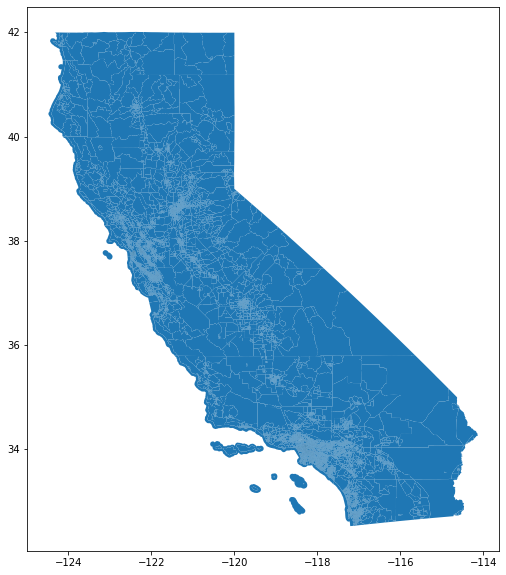

In [26]:
blockshape=blockshape[['GEOID', 'geometry']]
blockshape.plot(figsize=(10,10))

The data is for all of california. 

In [27]:
block2013v = blockshape.merge(block2013, on='GEOID')

To check for the merged data

In [28]:
block2013v.head()

,GEOID,geometry,Total_2013,Non Hispanic_2013,Non Hispanic White_2013,Non Hispanic Black_2013,Non Hispanic American Indian and Alaska Native_2013,Non Hispanic Asian_2013,Non Hispanic Native Hawaiian and Other Pacific Islander_2013,Non Hispanic Some other race_2013,Non Hispanic Two or more races_2013,Hispanic_2013,NAME
0,060014403351,"POLYGON ((-122.01845 37.59582, -122.01841 37.5...",2773,2595,361,51,19,2022,11,0,131,178,"Block Group 1, Census Tract 4403.35, Alameda C..."
1,060014423012,"POLYGON ((-121.96678 37.53030, -121.96678 37.5...",1371,990,339,21,0,594,0,0,36,381,"Block Group 2, Census Tract 4423.01, Alameda C..."
2,060014060001,"POLYGON ((-122.26735 37.78872, -122.26445 37.7...",753,480,143,45,9,253,0,0,30,273,"Block Group 1, Census Tract 4060, Alameda Coun..."
3,060014337001,"POLYGON ((-122.11467 37.68870, -122.11462 37.6...",931,376,241,93,10,6,0,0,26,555,"Block Group 1, Census Tract 4337, Alameda Coun..."
4,060014364012,"POLYGON ((-122.07302 37.67305, -122.07265 37.6...",2296,1800,878,363,0,499,0,0,60,496,"Block Group 2, Census Tract 4364.01, Alameda C..."


To check if the data merged well, let us check its shape and plot it. 

In [29]:
block2013v.shape

(1046, 13)

In [30]:
block2013.shape

(1046, 12)

<AxesSubplot:>

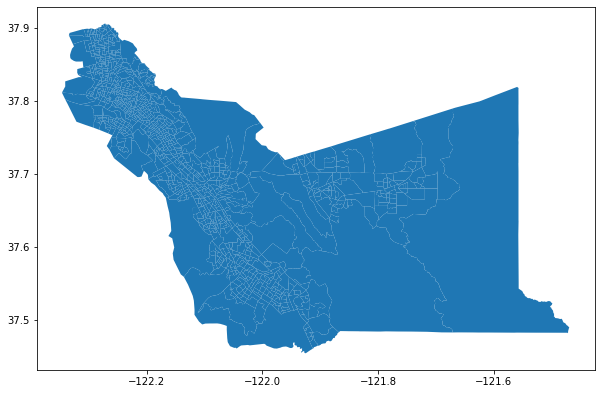

In [31]:
block2013v.plot(figsize=(10,10))

In [32]:
block2013v.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1046 entries, 0 to 1045
Data columns (total 13 columns):
 #   Column                                                        Non-Null Count  Dtype   
---  ------                                                        --------------  -----   
 0   GEOID                                                         1046 non-null   object  
 1   geometry                                                      1046 non-null   geometry
 2   Total_2013                                                    1046 non-null   object  
 3   Non Hispanic_2013                                             1046 non-null   object  
 4   Non Hispanic White_2013                                       1046 non-null   object  
 5   Non Hispanic Black_2013                                       1046 non-null   object  
 6   Non Hispanic American Indian and Alaska Native_2013           1046 non-null   object  
 7   Non Hispanic Asian_2013                             

## Creating percentage for different ethnicity groups for each year within a tract. 

We first check datatype of the dataframe, and make any corrections as required. Next we add new columns that calculate the percentages. 

In [33]:
random_tract= block2013v.sample(1)
random_tract

,GEOID,geometry,Total_2013,Non Hispanic_2013,Non Hispanic White_2013,Non Hispanic Black_2013,Non Hispanic American Indian and Alaska Native_2013,Non Hispanic Asian_2013,Non Hispanic Native Hawaiian and Other Pacific Islander_2013,Non Hispanic Some other race_2013,Non Hispanic Two or more races_2013,Hispanic_2013,NAME
621,060014403013,"POLYGON ((-122.05349 37.59710, -122.05348 37.5...",1725,1536,289,186,8,1029,0,0,24,189,"Block Group 3, Census Tract 4403.01, Alameda C..."


In [34]:
type(random_tract.iloc[0]['Non Hispanic_2013'])

str

In [118]:
dtypes = ['Total_2013', 
 'Non Hispanic White_2013',
 'Non Hispanic Black_2013',
 'Non Hispanic American Indian and Alaska Native_2013',
 'Non Hispanic Asian_2013',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2013',
 'Non Hispanic Some other race_2013',
 'Non Hispanic Two or more races_2013',
 'Hispanic_2013']

In [119]:
for i in dtypes:
    block_2019_2013[i]=block_2019_2013[i].astype(float)

In [37]:
random_tract2 = block2013v.sample(1)

In [38]:
type(random_tract2.iloc[0]['Non Hispanic_2013'])

numpy.float64

In [39]:
random_block=block2019.sample(1)

In [40]:
type(random_block.iloc[0]['Non Hispanic_2019'])

numpy.float64

In [120]:
block_2019_2013.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1046 entries, 0 to 1045
Data columns (total 24 columns):
 #   Column                                                        Non-Null Count  Dtype   
---  ------                                                        --------------  -----   
 0   GEOID_2019                                                    1046 non-null   object  
 1   NAME_2019                                                     1046 non-null   object  
 2   Total_2019                                                    1046 non-null   float64 
 3   Non Hispanic White_2019                                       1046 non-null   float64 
 4   Non Hispanic Black_2019                                       1046 non-null   float64 
 5   Non Hispanic American Indian and Alaska Native_2019           1046 non-null   float64 
 6   Non Hispanic Asian_2019                                       1046 non-null   float64 
 7   Non Hispanic Native Hawaiian and Other Pacific Islan

In [84]:
block_2013_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1045
Data columns (total 26 columns):
 #   Column                                                        Non-Null Count  Dtype   
---  ------                                                        --------------  -----   
 0   Total_2013                                                    1046 non-null   float64 
 1   Non Hispanic_2013                                             1046 non-null   float64 
 2   Non Hispanic White_2013                                       1046 non-null   float64 
 3   Non Hispanic Black_2013                                       1046 non-null   float64 
 4   Non Hispanic American Indian and Alaska Native_2013           1046 non-null   float64 
 5   Non Hispanic Asian_2013                                       1046 non-null   float64 
 6   Non Hispanic Native Hawaiian and Other Pacific Islander_2013  1046 non-null   float64 
 7   Non Hispanic Some other race_2013                           

In [127]:
#block2019.to_csv(r'block2019.csv')
#block2013v

dtypes = ['Total_2013', 
 'Non Hispanic White_2013',
 'Non Hispanic Black_2013',
 'Non Hispanic American Indian and Alaska Native_2013',
 'Non Hispanic Asian_2013',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2013',
 'Non Hispanic Some other race_2013',
 'Non Hispanic Two or more races_2013',
 'Hispanic_2013']

dtypes2019 = ['Total_2019', 
 'Non Hispanic White_2019',
 'Non Hispanic Black_2019',
 'Non Hispanic American Indian and Alaska Native_2019',
 'Non Hispanic Asian_2019',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2019',
 'Non Hispanic Some other race_2019',
 'Non Hispanic Two or more races_2019',
 'Hispanic_2019']

Both the tracts have numbers. Now to add the percentages of different ethnicities: 

In [128]:
def createpercentage(block, year):
    for x in dtypes2019:
        block[("Percent " + x)] = block[x]/block["Total_"+ year]*100
        print(x, "Completed")

In [129]:
#createpercentage(block_2019_2013, "2013")
createpercentage(block_2019_2013, "2019")

Total_2019 Completed
Non Hispanic White_2019 Completed
Non Hispanic Black_2019 Completed
Non Hispanic American Indian and Alaska Native_2019 Completed
Non Hispanic Asian_2019 Completed
Non Hispanic Native Hawaiian and Other Pacific Islander_2019 Completed
Non Hispanic Some other race_2019 Completed
Non Hispanic Two or more races_2019 Completed
Hispanic_2019 Completed


In [132]:
block_2019_2013.to_csv('block_2019_2013.csv')
#block_2019_2013.columns

In [101]:
block_2019_2013.columns

Index(['GEOID_2019', 'NAME_2019', 'Total_2019', 'Non Hispanic_2019',
       'Non Hispanic White_2019', 'Non Hispanic Black_2019',
       'Non Hispanic American Indian and Alaska Native_2019',
       'Non Hispanic Asian_2019',
       'Non Hispanic Native Hawaiian and Other Pacific Islander_2019',
       'Non Hispanic Some other race_2019',
       'Non Hispanic Two or more races_2019', 'Hispanic_2019', 'geometry',
       'new_GEOID', 'Total_2013', 'Non Hispanic_2013',
       'Non Hispanic White_2013', 'Non Hispanic Black_2013',
       'Non Hispanic American Indian and Alaska Native_2013',
       'Non Hispanic Asian_2013',
       'Non Hispanic Native Hawaiian and Other Pacific Islander_2013',
       'Non Hispanic Some other race_2013',
       'Non Hispanic Two or more races_2013', 'Hispanic_2013', 'GEOID_2013',
       'NAME_2013', 'Percent Total_2013', 'Percent Non Hispanic_2013',
       'Percent Non Hispanic White_2013', 'Percent Non Hispanic Black_2013',
       'Percent Non Hispanic Ame

In [92]:
block2019

,GEOID,NAME,Total_2019,Non Hispanic_2019,Non Hispanic White_2019,Non Hispanic Black_2019,Non Hispanic American Indian and Alaska Native_2019,Non Hispanic Asian_2019,Non Hispanic Native Hawaiian and Other Pacific Islander_2019,Non Hispanic Some other race_2019,Non Hispanic Two or more races_2019,Hispanic_2019,geometry,new_GEOID
1,15000US060014001001,"Block Group 1, Alameda, CA",3120.0,3002.0,2317.0,107.0,0.0,391.0,0.0,0.0,187.0,118.0,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466...",US060014001001
2,15000US060014002001,"Block Group 1, Alameda, CA",990.0,894.0,761.0,13.0,4.0,41.0,0.0,0.0,75.0,96.0,"MULTIPOLYGON (((-122.25508 37.84607, -122.2542...",US060014002001
3,15000US060014002002,"Block Group 2, Alameda, CA",1017.0,939.0,714.0,39.0,0.0,130.0,0.0,0.0,56.0,78.0,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577...",US060014002002
4,15000US060014003001,"Block Group 1, Alameda, CA",1134.0,1059.0,735.0,0.0,0.0,274.0,0.0,0.0,50.0,75.0,"MULTIPOLYGON (((-122.25186 37.84475, -122.2517...",US060014003001
5,15000US060014003002,"Block Group 2, Alameda, CA",1237.0,1139.0,1008.0,18.0,0.0,113.0,0.0,0.0,0.0,98.0,"MULTIPOLYGON (((-122.26230 37.83786, -122.2622...",US060014003002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,15000US060014517042,"Block Group 2, Alameda, CA",2498.0,2273.0,1980.0,0.0,0.0,219.0,40.0,0.0,34.0,225.0,"MULTIPOLYGON (((-121.79844 37.66084, -121.7984...",US060014517042
1043,15000US060014517043,"Block Group 3, Alameda, CA",807.0,662.0,479.0,17.0,10.0,47.0,0.0,0.0,109.0,145.0,"MULTIPOLYGON (((-121.78511 37.66709, -121.7844...",US060014517043
1044,15000US060019819001,"Block Group 1, Alameda, CA",58.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,"MULTIPOLYGON (((-122.34668 37.81103, -122.3441...",US060019819001
1045,15000US060019820001,"Block Group 1, Alameda, CA",63.0,55.0,10.0,23.0,2.0,20.0,0.0,0.0,0.0,8.0,"MULTIPOLYGON (((-122.31439 37.79484, -122.3135...",US060019820001


In [91]:
col2019

NameError: name 'col2019' is not defined

In [49]:
dtypes19 = ['Total_2019', 
 'Non Hispanic_2019',
 'Non Hispanic White_2019',
 'Non Hispanic Black_2019',
 'Non Hispanic American Indian and Alaska Native_2019',
 'Non Hispanic Asian_2019',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2019',
 'Non Hispanic Some other race_2019',
 'Non Hispanic Two or more races_2019',
 'Hispanic_2019']
def createpercentage19(block):
    for x in dtypes19:
        block[("Percent " + x)] = block[x]/block['Total_2019']*100
        print(x, "Completed")

In [50]:
createpercentage19(block2019)

Total_2019 Completed
Non Hispanic_2019 Completed
Non Hispanic White_2019 Completed
Non Hispanic Black_2019 Completed
Non Hispanic American Indian and Alaska Native_2019 Completed
Non Hispanic Asian_2019 Completed
Non Hispanic Native Hawaiian and Other Pacific Islander_2019 Completed
Non Hispanic Some other race_2019 Completed
Non Hispanic Two or more races_2019 Completed
Hispanic_2019 Completed


/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [51]:
block2019.head()

,GEOID,NAME,Total_2019,Non Hispanic_2019,Non Hispanic White_2019,Non Hispanic Black_2019,Non Hispanic American Indian and Alaska Native_2019,Non Hispanic Asian_2019,Non Hispanic Native Hawaiian and Other Pacific Islander_2019,Non Hispanic Some other race_2019,...,Percent Total_2019,Percent Non Hispanic_2019,Percent Non Hispanic White_2019,Percent Non Hispanic Black_2019,Percent Non Hispanic American Indian and Alaska Native_2019,Percent Non Hispanic Asian_2019,Percent Non Hispanic Native Hawaiian and Other Pacific Islander_2019,Percent Non Hispanic Some other race_2019,Percent Non Hispanic Two or more races_2019,Percent Hispanic_2019
1,060014001001,"Block Group 1, Alameda, CA",3120.0,3002.0,2317.0,107.0,0.0,391.0,0.0,0.0,...,100.0,96.217949,74.262821,3.429487,0.00000,12.532051,0.0,0.0,5.993590,3.782051
2,060014002001,"Block Group 1, Alameda, CA",990.0,894.0,761.0,13.0,4.0,41.0,0.0,0.0,...,100.0,90.303030,76.868687,1.313131,0.40404,4.141414,0.0,0.0,7.575758,9.696970
3,060014002002,"Block Group 2, Alameda, CA",1017.0,939.0,714.0,39.0,0.0,130.0,0.0,0.0,...,100.0,92.330383,70.206490,3.834808,0.00000,12.782694,0.0,0.0,5.506391,7.669617
4,060014003001,"Block Group 1, Alameda, CA",1134.0,1059.0,735.0,0.0,0.0,274.0,0.0,0.0,...,100.0,93.386243,64.814815,0.000000,0.00000,24.162257,0.0,0.0,4.409171,6.613757
5,060014003002,"Block Group 2, Alameda, CA",1237.0,1139.0,1008.0,18.0,0.0,113.0,0.0,0.0,...,100.0,92.077607,81.487470,1.455133,0.00000,9.135004,0.0,0.0,0.000000,7.922393


In [93]:
gdf

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1045
Data columns (total 36 columns):
 #   Column                                                                Non-Null Count  Dtype   
---  ------                                                                --------------  -----   
 0   Total_2013                                                            1046 non-null   float64 
 1   Non Hispanic_2013                                                     1046 non-null   float64 
 2   Non Hispanic White_2013                                               1046 non-null   float64 
 3   Non Hispanic Black_2013                                               1046 non-null   float64 
 4   Non Hispanic American Indian and Alaska Native_2013                   1046 non-null   float64 
 5   Non Hispanic Asian_2013                                               1046 non-null   float64 
 6   Non Hispanic Native Hawaiian and Other Pacific Islander_2013          1046 non-null   fl

In [71]:
block2013v.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1046 entries, 0 to 1045
Data columns (total 23 columns):
 #   Column                                                                Non-Null Count  Dtype   
---  ------                                                                --------------  -----   
 0   GEOID                                                                 1046 non-null   object  
 1   geometry                                                              1046 non-null   geometry
 2   Total_2013                                                            1046 non-null   float64 
 3   Non Hispanic_2013                                                     1046 non-null   float64 
 4   Non Hispanic White_2013                                               1046 non-null   float64 
 5   Non Hispanic Black_2013                                               1046 non-null   float64 
 6   Non Hispanic American Indian and Alaska Native_2013                   1046 non-n

## % change from 2013 to 2019

We first merge the two oriblockall=gpd.sjoin(block2019, block2013v)ginal data frames to be able to do it. Runing the code 

In [102]:
block_2019_2013['geometry']

0       MULTIPOLYGON (((-122.24692 37.88544, -122.2466...
1       MULTIPOLYGON (((-122.25508 37.84607, -122.2542...
2       MULTIPOLYGON (((-122.25792 37.84261, -122.2577...
3       MULTIPOLYGON (((-122.25186 37.84475, -122.2517...
4       MULTIPOLYGON (((-122.26230 37.83786, -122.2622...
                              ...                        
1041    MULTIPOLYGON (((-121.79844 37.66084, -121.7984...
1042    MULTIPOLYGON (((-121.78511 37.66709, -121.7844...
1043    MULTIPOLYGON (((-122.34668 37.81103, -122.3441...
1044    MULTIPOLYGON (((-122.31439 37.79484, -122.3135...
1045    MULTIPOLYGON (((-122.28417 37.79402, -122.2838...
Name: geometry, Length: 1046, dtype: geometry

In [56]:
block2013v=block2013v.to_crs(epsg=4326)
block2019=block2019.to_crs(epsg=4326)

block_2019_2013=block_2019_2013.to_crs(epsg=4326)


In [57]:
blockall=gpd.sjoin(block2019, block2013v)

In [142]:
ball.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1046 entries, 0 to 1045
Data columns (total 42 columns):
 #   Column                                                                Non-Null Count  Dtype   
---  ------                                                                --------------  -----   
 0   GEOID_2019                                                            1046 non-null   object  
 1   NAME_2019                                                             1046 non-null   object  
 2   Total_2019                                                            1046 non-null   float64 
 3   Non Hispanic White_2019                                               1046 non-null   float64 
 4   Non Hispanic Black_2019                                               1046 non-null   float64 
 5   Non Hispanic American Indian and Alaska Native_2019                   1046 non-null   float64 
 6   Non Hispanic Asian_2019                                               1046 non-n

In [138]:
ball=block_2019_2013

for i in list(ball.columns):
    if "2013" in i:
        if "Percent" in i:
            ball[i]=ball[i].replace(0,0.00000001)
            print('done '+i)
#ball

done Percent Total_2013
done Percent Non Hispanic White_2013
done Percent Non Hispanic Black_2013
done Percent Non Hispanic American Indian and Alaska Native_2013
done Percent Non Hispanic Asian_2013
done Percent Non Hispanic Native Hawaiian and Other Pacific Islander_2013
done Percent Non Hispanic Some other race_2013
done Percent Non Hispanic Two or more races_2013
done Percent Hispanic_2013


In [1]:
ball

NameError: name 'ball' is not defined

In [140]:
for i in list(ball.columns):
    if "2019" in i:
        if "Percent" in i:
            print(i)
        else:
            ball[i.split("_")[0]+"_change"]= (((ball[i]-ball[i.split("_")[0]+"_2013"])/ball[i.split("_")[0]+"_2013"])*100)
ball

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [61]:
ball.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 7433 entries, 1 to 1043
Data columns (total 56 columns):
 #   Column                                                                Non-Null Count  Dtype   
---  ------                                                                --------------  -----   
 0   GEOID_left                                                            7433 non-null   object  
 1   NAME_left                                                             7433 non-null   object  
 2   Total_2019                                                            7433 non-null   float64 
 3   Non Hispanic_2019                                                     7433 non-null   float64 
 4   Non Hispanic White_2019                                               7433 non-null   float64 
 5   Non Hispanic Black_2019                                               7433 non-null   float64 
 6   Non Hispanic American Indian and Alaska Native_2019                   7433 non-n

In [62]:
ball.head()

,GEOID_left,NAME_left,Total_2019,Non Hispanic_2019,Non Hispanic White_2019,Non Hispanic Black_2019,Non Hispanic American Indian and Alaska Native_2019,Non Hispanic Asian_2019,Non Hispanic Native Hawaiian and Other Pacific Islander_2019,Non Hispanic Some other race_2019,...,Total_change,Non Hispanic_change,Non Hispanic White_change,Non Hispanic Black_change,Non Hispanic American Indian and Alaska Native_change,Non Hispanic Asian_change,Non Hispanic Native Hawaiian and Other Pacific Islander_change,Non Hispanic Some other race_change,Non Hispanic Two or more races_change,Hispanic_change
1,060014001001,"Block Group 1, Alameda, CA",3120.0,3002.0,2317.0,107.0,0.0,391.0,0.0,0.0,...,166.894782,172.909091,207.702523,81.355932,NaN,62.240664,NaN,NaN,297.872340,71.014493
2,060014002001,"Block Group 1, Alameda, CA",990.0,894.0,761.0,13.0,4.0,41.0,0.0,0.0,...,-15.312233,-18.727273,1.062417,-77.966102,inf,-82.987552,NaN,NaN,59.574468,39.130435
3,060014002002,"Block Group 2, Alameda, CA",1017.0,939.0,714.0,39.0,0.0,130.0,0.0,0.0,...,-13.002566,-14.636364,-5.179283,-33.898305,NaN,-46.058091,NaN,NaN,19.148936,13.043478
4,060014003001,"Block Group 1, Alameda, CA",1134.0,1059.0,735.0,0.0,0.0,274.0,0.0,0.0,...,-2.994012,-3.727273,-2.390438,-100.000000,NaN,13.692946,NaN,NaN,6.382979,8.695652
101,060014042001,"Block Group 1, Alameda, CA",944.0,917.0,685.0,35.0,3.0,102.0,20.0,23.0,...,-19.247220,-16.636364,-9.030544,-40.677966,inf,-57.676349,inf,inf,4.255319,-60.869565


In [133]:
block_2019_2013.to_file("block_2019_2013.geojson", driver='GeoJSON')

In [143]:
col2019=[
 'Percent Non Hispanic White_2019',
 'Percent Non Hispanic Black_2019',
 'Percent Non Hispanic American Indian and Alaska Native_2019',
 'Percent Non Hispanic Asian_2019',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander_2019',
 'Percent Non Hispanic Some other race_2019',
 'Percent Non Hispanic Two or more races_2019',
 'Percent Hispanic_2019']

col2013=[
 'Percent Non Hispanic White_2013',
 'Percent Non Hispanic Black_2013',
 'Percent Non Hispanic American Indian and Alaska Native_2013',
 'Percent Non Hispanic Asian_2013',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander_2013',
 'Percent Non Hispanic Some other race_2013',
 'Percent Non Hispanic Two or more races_2013',
 'Percent Hispanic_2013']

In [144]:
perc_2019_sq=0
for k in col2019: 
    perc_2019_sq+= ball[k]**2 
    
K=len(col2019)
ball['perc_2019_sq']=perc_2019_sq

ball['iqv_2019']= (100**2 -ball['perc_2019_sq'])*K / (100**2*(K-1))

perc_2013_sq=0
for k in col2013: 
    perc_2013_sq+= ball[k]**2 
ball['perc_2013_sq']=perc_2013_sq
ball['iqv_2013']= (100**2 -ball['perc_2013_sq'])*K / (100**2*(K-1))

ball[['perc_2013_sq', 'iqv_2013', 'perc_2019_sq','iqv_2019']].head(20)



,perc_2013_sq,iqv_2013,perc_2019_sq,iqv_2019
0,4553.276735,0.622483,5734.007232,0.487542
1,5327.561406,0.533993,6079.257219,0.448085
2,5153.442606,0.553892,5196.197581,0.549006
3,4381.674737,0.642094,4847.957473,0.588805
4,4340.201217,0.646834,6788.537737,0.367024
5,3916.788903,0.695224,4265.135266,0.655413
6,5955.552140,0.462223,4912.338251,0.581447
7,4830.763273,0.590770,5154.516131,0.553770
8,3503.901270,0.742411,3581.314879,0.733564
9,4815.388382,0.592527,4228.815876,0.659564


<AxesSubplot:>

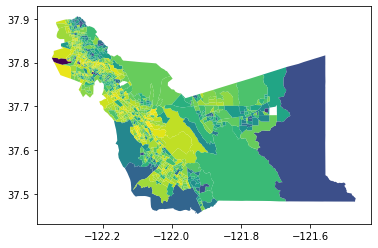

In [145]:
ball.plot(column='iqv_2013')

<AxesSubplot:>

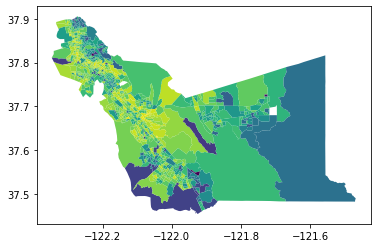

In [146]:
ball.plot(column='iqv_2019')

In [147]:
ball.to_file('ethnicityindex.geojson', driver='GeoJSON')

In [149]:
stations=gpd.read_file("stations.geojson")
tod=stations[stations['TOD']=='Yes']
ntod=stations[stations['TOD']=='No']

In [150]:
# reproject to Web Mercator
ball_webmer = ball.to_crs(epsg=3857)

stations_webmer = stations.to_crs(epsg=3857)
tod_wm=tod.to_crs(epsg=3857)
ntod_wm=ntod.to_crs(epsg=3857)

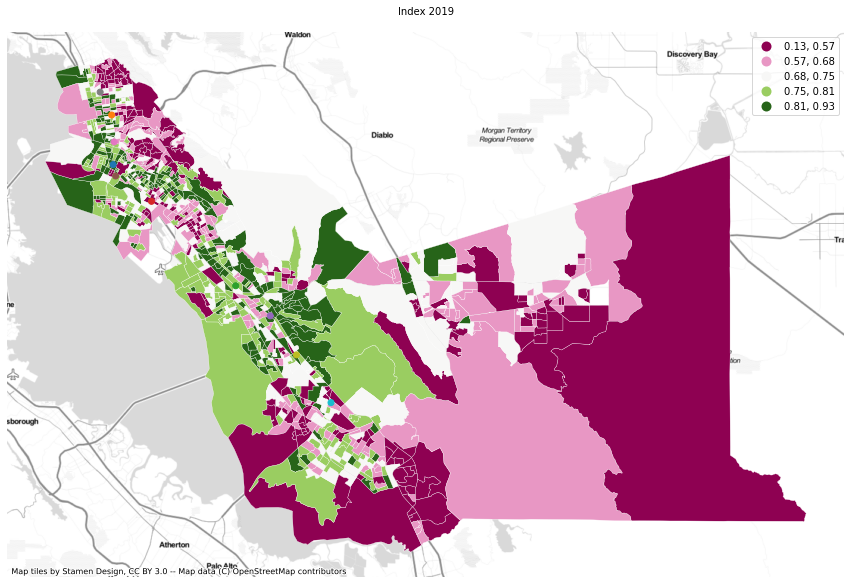

In [153]:
fig, ax = plt.subplots(figsize=(15, 15))
ball_webmer.plot(column=ball['iqv_2019'],
                        cmap='PiYG', 
                        scheme='quantiles',
                        edgecolor='white', 
                        linewidth=0.3, 
                        ax=ax, 
                        legend=True
                       )
stations_webmer.plot(column=stations['Station'],
                         ax=ax
                        )
ax.axis('off')
ax.set_title('Index 2019',fontsize=10,pad=18)
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)

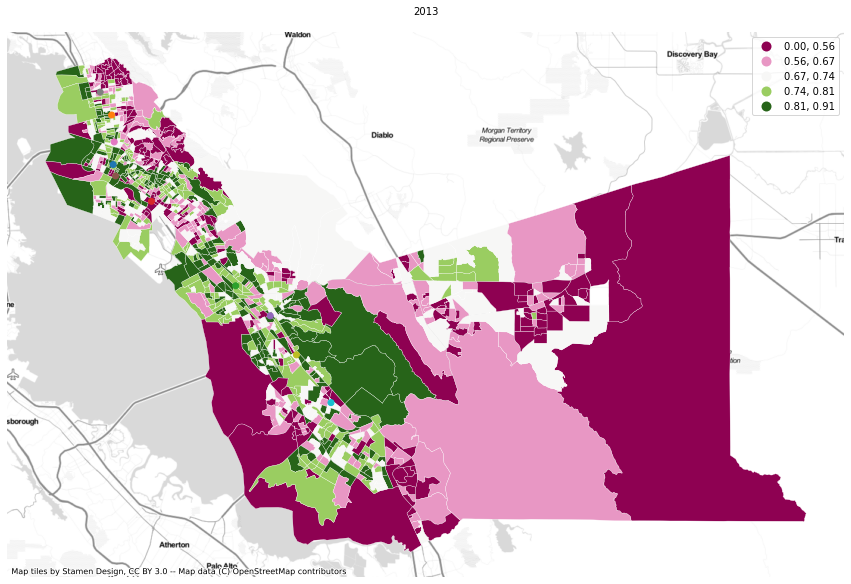

In [154]:
fig, ax = plt.subplots(figsize=(15, 15))
ball_webmer.plot(column=ball['iqv_2013'],
                        cmap='PiYG', 
                        scheme='quantiles',
                        edgecolor='white', 
                        linewidth=0.3, 
                        ax=ax, 
                        legend=True
                       )
stations_webmer.plot(column=stations['Station'],
                         ax=ax
                        )
ax.axis('off')
ax.set_title('2013',fontsize=10,pad=18)
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)

AttributeError: 'numpy.ndarray' object has no attribute 'axis'

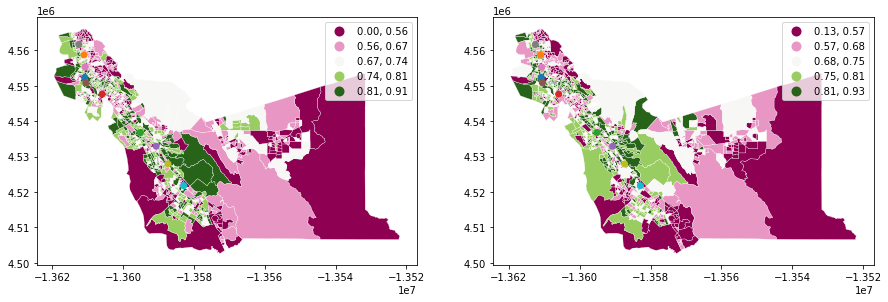

In [155]:
fig, ax = plt.subplots(1,2,figsize=(15, 15))
ax1,ax2=ax
ball_webmer.plot(column=ball['iqv_2013'],
                        cmap='PiYG', 
                        scheme='quantiles',
                        edgecolor='white', 
                        linewidth=0.3, 
                        ax=ax1, 
                        legend=True
                       )
stations_webmer.plot(column=stations['Station'],
                         ax=ax1
                        )

ball_webmer.plot(column=ball['iqv_2019'],
                        cmap='PiYG', 
                        scheme='quantiles',
                        edgecolor='white', 
                        linewidth=0.3, 
                        ax=ax2, 
                        legend=True
                       )
stations_webmer.plot(column=stations['Station'],
                         ax=ax2
                        )
ax.axis('off')
ax.set_title('Index 2019',fontsize=10,pad=18)
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)